## Importing Libraries

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.stats import skew
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from IPython.display import display

# Definitions
pd.options.display.max_columns = None

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

## Importing Datasets

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# We should refrain from analysing test data so we will only use train data
# Numeric Features
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Categorical Features
train_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


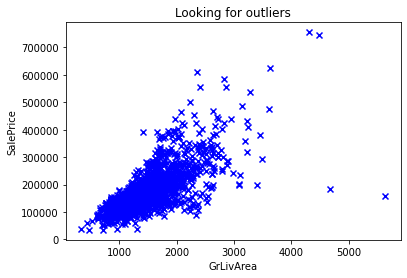

In [6]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train_data.GrLivArea, train_data.SalePrice, c = "blue", marker='x')
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

There seems to be 2 extreme outliers on the bottom right, really large houses that sold for really cheap. More generally, the author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset.
Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

In [7]:
train_data = train_data[train_data['GrLivArea'] < 4000]

In [8]:
train_features = train_data.drop(['Id', 'SalePrice'], axis=1)
test_features = test_data.drop(['Id'], axis=1)

# Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.
train_labels = np.log1p(train_data['SalePrice'])

## Missing values

Getting features with missing values

In [9]:
missing = round(pd.concat([train_features, test_features]).isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

Visualize missing values

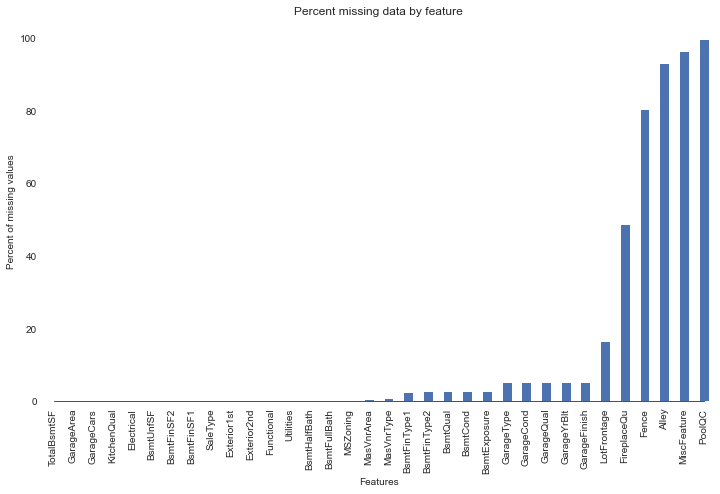

In [10]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(12, 7))
sns.set_color_codes(palette='deep')
missing.plot.bar(color="b")

# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

Creating a dictionary having medians of the LotFrontage grouped by the Neighborhood feature

In [11]:
lotfrontage_grpby_neighbor = {}
neighbor_category = train_features['Neighborhood'].unique()
for category in neighbor_category:
    lotfrontage_grpby_neighbor[category] = train_features['LotFrontage'].loc[train_features['Neighborhood'] == category].median()

Function to handle missing values.  
Function makes it easy to apply same steps to test data and other future data.

In [12]:
def handle_missing_value(data):
    # Group by the neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
    for category in neighbor_category:
        data.loc[(data['LotFrontage'].isnull()) & (data['Neighborhood'] == category), 'LotFrontage'] = lotfrontage_grpby_neighbor[category]
    
    # In GarageFinish, GarageCond, GarageQual and GarageType Nan = No Garage
    for feature in ['GarageFinish', 'GarageCond', 'GarageQual', 'GarageType']:
        data[feature] = data[feature].fillna('NA')
    
    # GarageYrBlt Nan = No Garage
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())
    
    # GarageCars and GarageArea should be zero if there is no garage
    data['GarageArea'] = data['GarageArea'].fillna(0)
    data['GarageCars'] = data['GarageCars'].fillna(0)
    
    # In BsmtFinType1, BsmtFinType2, BsmtCond, BsmtQual and BsmtExposure Nan = No basement
    for feature in ['BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure']:
        data[feature] = data[feature].fillna('NA')
    
    # BsmtExposure
    #  if BsmtQual = NA(i.e no basement) then BsmtExposure = NA
    #  else BsmtExposure = No
    data.loc[data['BsmtQual'] == 'NA', 'BsmtExposure'] = 'NA'
    data['BsmtExposure'] = data['BsmtExposure'].fillna('No')
    
    # For BsmtFullBath and BsmtHalfBath as seen from pd.describe (mean, median) are (0.4, 0) and (0.05, 0) respectively 
    # so we will fillna with 0
    data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)
    data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
    
    # For Alley, PoolQC, MiscFeature, Fence and FireplaceQu 'Nan' means does not have that facility
    for feature in ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu']:
        data[feature] = data[feature].fillna('NA')
    
    # Using Mode for some relevent features(mode is known from above pd.describe)
    data['Electrical'] = data['Electrical'].fillna('SBrkr')
    data['Utilities'] = data['Utilities'].fillna('AllPub')
    data['Exterior1st'] = data['Exterior1st'].fillna('VinylSd')
    data['Exterior2nd'] = data['Exterior2nd'].fillna('VinylSd')
    data['SaleType'] = data['SaleType'].fillna('WD')
    data['KitchenQual'] = data['KitchenQual'].fillna('TA')
    data['MSZoning'] = data['MSZoning'].fillna('RL')
    
    # As given in data discription.txt for Functional feature when nan use "Typ"
    data['Functional'] = data['Functional'].fillna('Typ')
    
    # When MasVnrType and MasVnrArea is null, then no veneers
    # When MasVnrArea is not null then we will fill nan(in MasVnrType) with category that is most frequent in types that have
    # MasVnrArea > 0 here it is "BrkFace" category
    data.loc[(data['MasVnrType'].isnull()) & (data['MasVnrArea'].isnull()), ['MasVnrType', 'MasVnrArea']] = ['None', 0]
    data['MasVnrType'] = data['MasVnrType'].fillna('BrkFace')
    
    # No Basement means 0 square feet
    for feature in ['BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2']:
        data[feature] = data[feature].fillna(0)
    
    return data

In [13]:
train_features = handle_missing_value(train_features)
test_features = handle_missing_value(test_features)

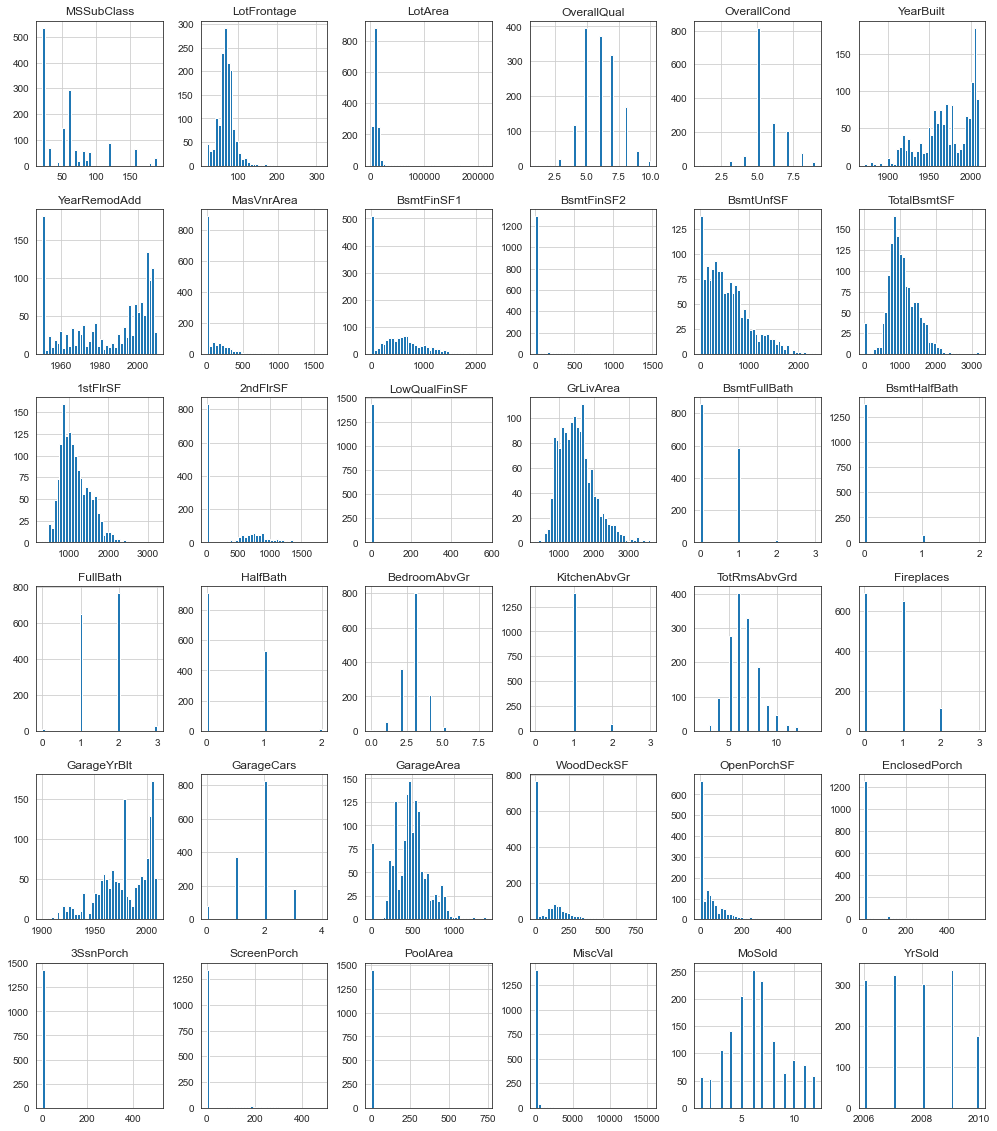

In [14]:
# visualizing distribution of numeric features
train_features.hist(bins= 40, figsize=(17, 20))
plt.show()

## Feature Engineering

Some numerical features are actually really categories

In [15]:
def categoric_in_numeric(data):
    data = data.replace({
        'MSSubClass': {20: 'SC20', 30: 'SC30', 40: 'SC40', 45: 'SC45', 50: 'SC50', 60: 'SC60', 
                       70: 'SC70', 75: 'SC75', 80: 'SC80', 85: 'SC85', 90: 'SC90', 120: 'SC120', 
                       150: 'SC150', 160: 'SC160', 180: 'SC180', 190: 'SC190'}, 
        'MoSold': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                   7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    })
    return data

Encode some categorical features as ordered numbers when there is information in the order.  
Information is given in data_description.txt

In [16]:
def manual_encoding(data):
    data = data.replace({
        'Street':{'Grvl': 1, 'Pave': 2},
        'Alley':{'NA': 0, 'Grvl': 1, 'Pave': 2},
        'LotShape':{'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4},
        'Utilities':{'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},
        'LandSlope':{'Sev': 1, 'Mod': 2, 'Gtl': 3},
        'ExterQual':{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'ExterCond':{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'BsmtQual':{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'BsmtCond':{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'BsmtExposure':{'NA': 0, 'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3},
        'BsmtFinType1':{'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
        'BsmtFinType2':{'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
        'HeatingQC':{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'CentralAir':{'N': 0, 'Y': 1},
        'Electrical':{'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
        'KitchenQual':{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'Functional':{'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
        'FireplaceQu':{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'GarageFinish':{'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
        'GarageQual':{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'GarageCond':{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'PavedDrive':{'N': 1, 'P': 2, 'Y': 3},
        'PoolQC':{'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
    })
    return data

Creating new features

In [17]:
def add_new_features(data):
    # Age is a better feature than the year
    features_with_year = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
    new_feature_names = ['HouseAge', 'RemodAge', 'GarageAge']        
    for i in range(len(features_with_year)):
        data[new_feature_names[i]] = data['YrSold'].astype(int) - data[features_with_year[i]].astype(int)
        # when sale condition is partial house could be completed after sale for such case age should be zero
        data.loc[data[new_feature_names[i]] < 0, new_feature_names[i]] = 0
    
    # Some simple logical features
    data['Has_WoodDeckSF'] = data['WoodDeckSF'].map(lambda x: 1 if x >0 else 0)
    data['Has_OpenPorchSF'] = data['OpenPorchSF'].map(lambda x: 1 if x >0 else 0)
    data['Has_EnclosedPorch'] = data['EnclosedPorch'].map(lambda x: 1 if x >0 else 0)
    data['Has_ScreenPorch'] = data['ScreenPorch'].map(lambda x: 1 if x >0 else 0)
    data['Has_3SsnPorch'] = data['3SsnPorch'].map(lambda x: 1 if x >0 else 0)
    data['Has_MiscFeature'] = data['MiscVal'].map(lambda x: 1 if x >0 else 0)
    data['Has_Pool'] = data['PoolArea'].map(lambda x: 1 if x >0 else 0)
    data['Has_Bsmt'] = data['TotalBsmtSF'].map(lambda x: 1 if x >0 else 0)
    data['Has_1stFlr'] = data['1stFlrSF'].map(lambda x: 1 if x >0 else 0)
    data['Has_2ndFlr'] = data['2ndFlrSF'].map(lambda x: 1 if x >0 else 0)
    data['Has_Garage'] = data['GarageArea'].map(lambda x: 1 if x >0 else 0)
    data['Has_MasVnr'] = data['MasVnrArea'].map(lambda x: 1 if x >0 else 0)
    
    # adding area of all porches
    data['TotalPorchSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['3SsnPorch']
    # getting total basement finished area in square feet
    data['TotalBsmtFinSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2']
    # getting total living area i.e, sum of above ground and basement area in square feet
    data['TotalLivArea'] = data['GrLivArea'] + data['TotalBsmtSF']
    # We will addup all the bathrooms and create a single column for bathrooms
    data['TotalBath'] = data['BsmtFullBath'] + data['FullBath'] + (data['BsmtHalfBath'] + data['HalfBath'])*0.5
    
    # Overall score for house
    data['OverallScore'] = data['OverallQual'] * data['OverallCond']
    # Overall Exterior matterial score
    data['ExterScore'] = data['ExterQual'] * data['ExterCond']
    # Overall Basement score
    data['BsmtScore'] = data['BsmtQual'] * data['BsmtCond']
    # Overall Garage score
    data['GarageScore'] = data['GarageQual'] * data['GarageCond']
    
    # Creating squares of numeric features
    for num_feature in data.select_dtypes(include='number').columns:
        data[num_feature + '_squared'] = np.square(data[num_feature])
    return data

In [18]:
train_features = add_new_features(manual_encoding(categoric_in_numeric(train_features)))
test_features = add_new_features(manual_encoding(categoric_in_numeric(test_features)))
train_features.shape

(1456, 182)

Log transform of the skewed numerical features to lessen impact of outliers  
Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models  
As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed

In [19]:
skewness = train_features.skew()
skewed_features = skewness[(skewness > 0.5) | (skewness < -0.5)]

def log_transformation(data, features = skewed_features.index):
    for feature in features:
        data[feature] = np.log1p(data[feature]) # log1p takes care of zero values
    return data

In [20]:
train_features = log_transformation(train_features)
test_features = log_transformation(test_features)

In [21]:
full = pd.get_dummies(pd.concat([train_features, test_features]))
full.shape

(2915, 349)

In [22]:
sc = StandardScaler()
train_features = sc.fit_transform(full.iloc[:1456])

In [23]:
test_features = sc.transform(full.iloc[1456:])

## Evaluating various models

Defining a cross-validation function that returns root mean squared error, this will help us evaluate our model and pick the best hyperparameter.  
Since we are using cross-validation we do not need to create train and validation sets separately.

In [24]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train_features, train_labels, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

We will be using random_state = 7 for all our model training

### Tuning stochastic gradient descent

In [25]:
sgd_alphas = np.arange(1.1, 2, 0.1)
cv_sgd = [rmse_cv(SGDRegressor(alpha = alpha, random_state=7)).mean() for alpha in sgd_alphas]

Text(0, 0.5, 'rmse')

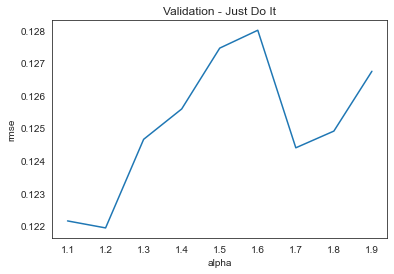

In [26]:
cv_sgd = pd.Series(cv_sgd, index = sgd_alphas)
cv_sgd.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Based on the above plot alpha = 1.2 is good

### Now, looking at Ridge Regressor

In [27]:
ridge_alphas = np.arange(400, 500, 10)
cv_ridge = [rmse_cv(Ridge(alpha = alpha, random_state=7)).mean() for alpha in ridge_alphas]

Text(0, 0.5, 'rmse')

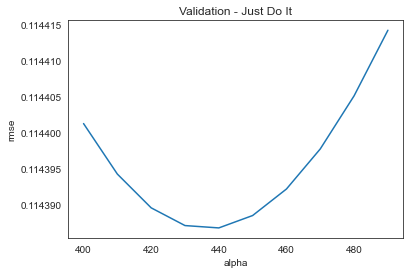

In [28]:
cv_ridge = pd.Series(cv_ridge, index = ridge_alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 440 is about right based on the plot above.

### Trying out Lasso regression

Alpha in lasso regression are the inverse of that in ridge regression

In [29]:
lasso_alphas = np.arange(0.001, 0.0055, 0.0005)
cv_lasso = [rmse_cv(Lasso(alpha = alpha, random_state=7)).mean() for alpha in lasso_alphas]

Text(0, 0.5, 'rmse')

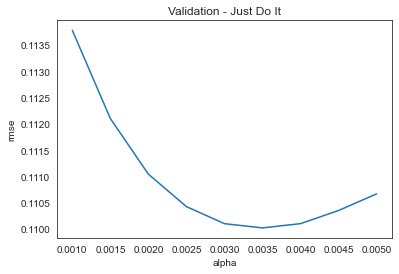

In [30]:
cv_lasso = pd.Series(cv_lasso, index = lasso_alphas)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Here, alpha = 0.0035 gives the best rmse value.  
As we can see Lasso regressor gives the best results of all models.

In [31]:
lasso_reg = Lasso(alpha=0.0035, random_state=7)
lasso_reg.fit(train_features, train_labels)

Lasso(alpha=0.0035, random_state=7)

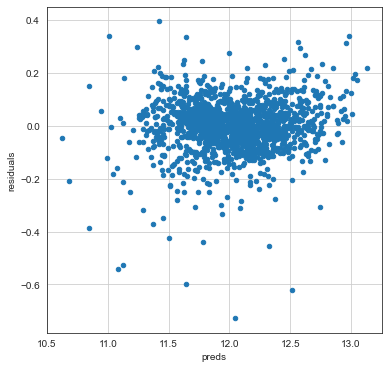

In [32]:
preds = pd.DataFrame({"preds":lasso_reg.predict(train_features), "true":train_labels})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter", figsize=(6, 6))
plt.grid()
plt.show()

Lasso regressor sets the coefficient of very less important features to zero. So lets take a look at just how many of those features are really important for our model.

In [33]:
coef = pd.Series(lasso_reg.coef_, index = full.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 102 variables and eliminated the other 247 variables


Lets look at our most important features

In [34]:
imp_coef = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(15)])

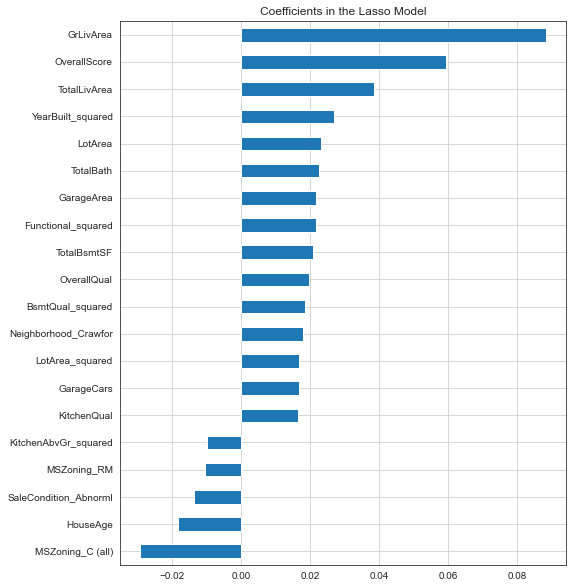

In [35]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.grid()
plt.show()

GrLivArea and OverallScore are the most crucial features in deciding the selling price of a house.  
Other important features are as shown in the plot above

In [36]:
abs_difference = np.abs(np.exp(preds["preds"]) - np.exp(preds["true"]))
q75, q25 = np.percentile(abs_difference, [75 ,25])
print('Average error in predictions: ', round(np.mean(abs_difference), -2))
print('With the interquartile of', round(q25, -2), 'to', round(q75, -2))

Average error in predictions:  12700.0
With the interquartile of 4200.0 to 16400.0


As we can see our model is working great with an average error of $12,700.  
Now, lets submit our predictions

## Submiting results

In [ ]:
y_submission = lasso_reg.predict(test_features)
y_submission = (np.exp(y_submission) -1)

In [ ]:
my_submission = pd.DataFrame({'Id':test_data['Id'], 'SalePrice':y_submission})
my_submission.to_csv('submissions.csv', index=False)